In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# стиль для графіків
sns.set(style="whitegrid")

df = pd.read_csv("data/index_1.csv")

df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [14]:
# Кількість рядків і колонок
print("🔹 Розмір датафрейму:", df.shape)

# Типи даних і кількість ненульових значень
print("\n🔹 Інформація про датафрейм:")
print(df.info())

# Опис статистики для числових колонок
print("\n🔹 Базова статистика:")
display(df.describe().T)

# Для категоріальних змінних
print("\n🔹 Унікальні значення по категоріях:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} унікальних значень")
    
print("\n🔹 Пропущені значення:")
display(df.isnull().sum().sort_values(ascending=False))


🔹 Розмір датафрейму: (3636, 6)

🔹 Інформація про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB
None

🔹 Базова статистика:


,count,mean,std,min,25%,50%,75%,max
money,3636.0,31.746859,4.919926,18.12,27.92,32.82,35.76,40.0



🔹 Унікальні значення по категоріях:
date: 381 унікальних значень
datetime: 3636 унікальних значень
cash_type: 2 унікальних значень
card: 1316 унікальних значень
coffee_name: 8 унікальних значень

🔹 Пропущені значення:


card           89
date            0
datetime        0
cash_type       0
money           0
coffee_name     0
dtype: int64

In [15]:
df['weekday'] = pd.to_datetime(df['datetime']).dt.day_name()

df['month'] = pd.to_datetime(df['datetime']).dt.month_name()

df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

coffee_map = {'Latte':'Coffee', 'Americano':'Coffee', 'Cappuccino':'Coffee',
              'Espresso':'Coffee', 'Flat White':'Coffee', 
              'Hot Chocolate':'Chocolate', 'Tea':'Tea'}
df['category'] = df['coffee_name'].map(coffee_map)

def assign_peak(hour):
    if 7 <= hour <= 10:
        return 'Morning Peak'
    elif 12 <= hour <= 14:
        return 'Lunch Peak'
    elif 17 <= hour <= 19:
        return 'Evening Peak'
    else:
        return 'Off-Peak'

df['hour_of_day'] = pd.to_datetime(df['datetime']).dt.hour
df['peak_period'] = df['hour_of_day'].apply(assign_peak)


In [16]:
df['time'] = pd.to_datetime(df['datetime']).dt.time


In [17]:
df.to_csv("updated_coffee_health.csv", index=False)
df.head()

,date,datetime,cash_type,card,money,coffee_name,weekday,month,day_type,category,hour_of_day,peak_period,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,Weekday,Coffee,10,Morning Peak,10:15:50.520000
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,Weekday,Chocolate,12,Lunch Peak,12:19:22.539000
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,Weekday,Chocolate,12,Lunch Peak,12:20:18.089000
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,Weekday,Coffee,13,Lunch Peak,13:46:33.006000
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,Weekday,Coffee,13,Lunch Peak,13:48:14.626000


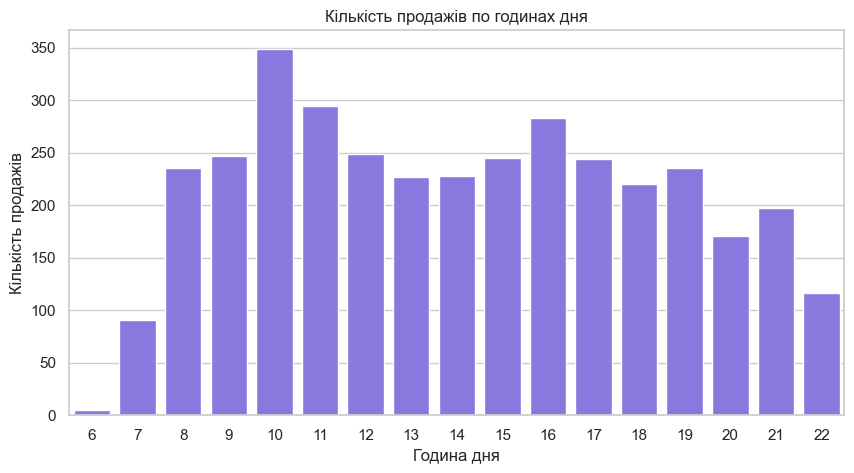

In [19]:
#Розподіл продажів по годинах дня, дає змогу побачити, в які години найчастіше купують каву.
plt.figure(figsize=(10,5))
sns.countplot(x='hour_of_day', data=df, color='mediumslateblue')  # замість palette
plt.title('Кількість продажів по годинах дня')
plt.xlabel('Година дня')
plt.ylabel('Кількість продажів')
plt.show()


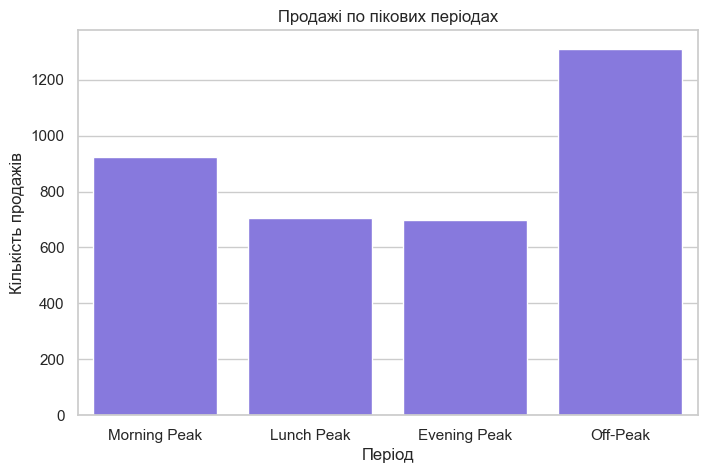

In [21]:
#Продажі по пікових періодах
plt.figure(figsize=(8,5))
sns.countplot(
    x='peak_period', 
    data=df, 
    order=['Morning Peak', 'Lunch Peak', 'Evening Peak', 'Off-Peak'],
    color='mediumslateblue'
)
plt.title('Продажі по пікових періодах')
plt.xlabel('Період')
plt.ylabel('Кількість продажів')
plt.show()

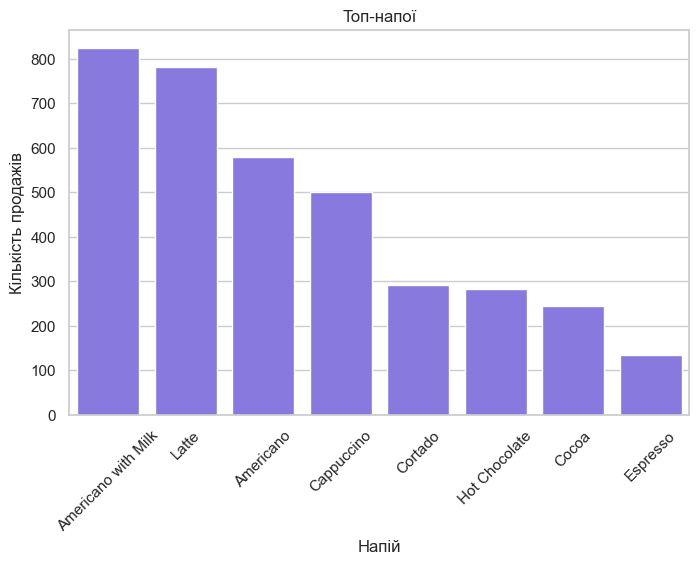

In [23]:
# Топ-напої
plt.figure(figsize=(8,5))
top_coffee = df['coffee_name'].value_counts()
sns.barplot(x=top_coffee.index, y=top_coffee.values, color='mediumslateblue')
plt.title('Топ-напої')
plt.xticks(rotation=45)
plt.xlabel('Напій')
plt.ylabel('Кількість продажів')
plt.show()


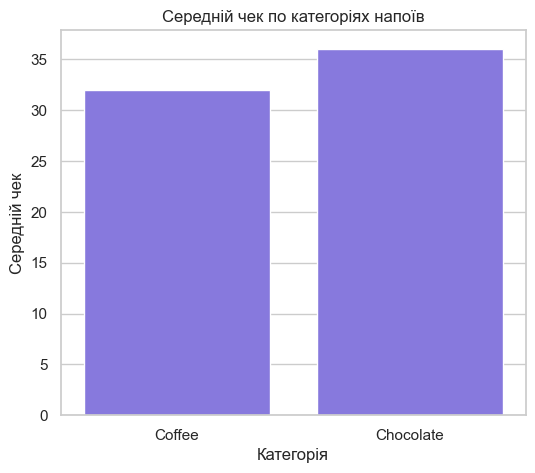

In [26]:
# Середній чек по категоріях
plt.figure(figsize=(6,5))
sns.barplot(
    x='category',
    y='money',
    data=df,
    estimator=np.mean,     # обчислюємо середнє
    errorbar=None,         # замість ci=None
    color='mediumslateblue'
)
plt.title('Середній чек по категоріях напоїв')
plt.xlabel('Категорія')
plt.ylabel('Середній чек')
plt.show()




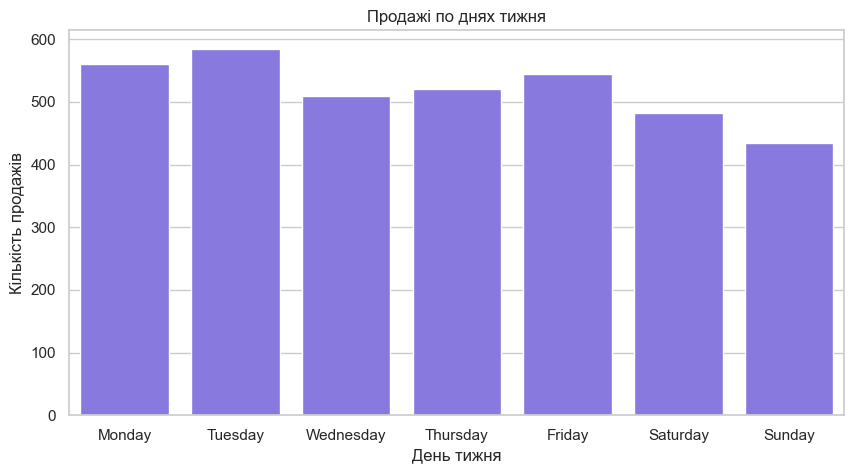

In [27]:
# Продажі по днях тижня
plt.figure(figsize=(10,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='weekday', data=df, order=order, color='mediumslateblue')
plt.title('Продажі по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.show()

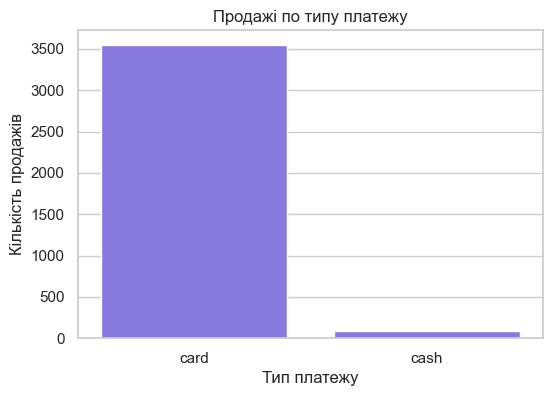

In [29]:
# Продажі по cash_type
plt.figure(figsize=(6,4))
sns.countplot(x='cash_type', data=df, color='mediumslateblue')
plt.title('Продажі по типу платежу')
plt.xlabel('Тип платежу')
plt.ylabel('Кількість продажів')
plt.show()

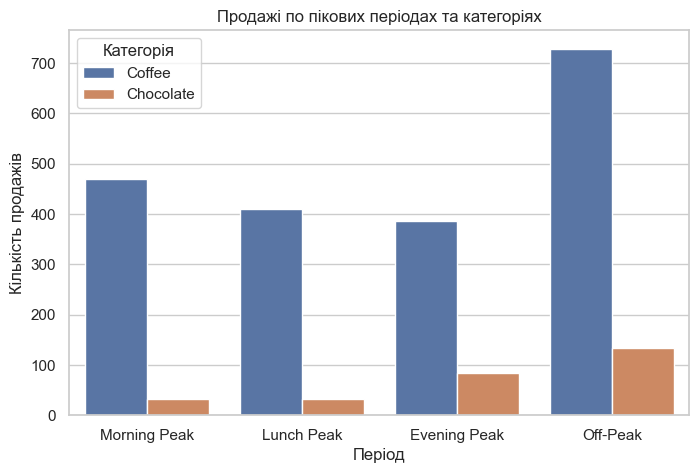

In [30]:
# Продажі по пікових періодах і категоріях (stacked-like)
plt.figure(figsize=(8,5))
sns.countplot(x='peak_period', hue='category', data=df, order=['Morning Peak','Lunch Peak','Evening Peak','Off-Peak'])
plt.title('Продажі по пікових періодах та категоріях')
plt.xlabel('Період')
plt.ylabel('Кількість продажів')
plt.legend(title='Категорія')
plt.show()

In [31]:
# Середній чек по пікових періодах
avg_check_peak = df.groupby('peak_period')['money'].mean()
print("Середній чек по пікових періодах:\n", avg_check_peak)

# Продажі по днях тижня та категоріях
sales_weekday_category = df.groupby(['weekday','category'])['money'].count().unstack()
print("\nПродажі по днях тижня та категоріях:\n", sales_weekday_category)

# Продажі по cash_type та peak_period
sales_cash_peak = df.groupby(['cash_type','peak_period'])['money'].count().unstack()
print("\nПродажі по типу платежу та пікових періодах:\n", sales_cash_peak)

Середній чек по пікових періодах:
 peak_period
Evening Peak    33.086638
Lunch Peak      31.311335
Morning Peak    30.782755
Off-Peak        31.944424
Name: money, dtype: float64

Продажі по днях тижня та категоріях:
 category   Chocolate  Coffee
weekday                     
Friday            45     304
Monday            35     324
Saturday          27     253
Sunday            40     223
Thursday          49     303
Tuesday           50     286
Wednesday         36     302

Продажі по типу платежу та пікових періодах:
 peak_period  Evening Peak  Lunch Peak  Morning Peak  Off-Peak
cash_type                                                    
card                  683         691           893      1280
cash                   16          13            29        31
